In [1]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.lines as lines
from ipywidgets import FloatProgress
from IPython.display import display


import rateModels3D as rm3D

In [2]:
def mstar_from_stellarprops(rstar, logg):
    """Gives stellar mass from the rstar and logg
       INPUT:
         rstar - Radius of star [Rsun]
         logg - log surface gravity [cgs]
       OUTPUT:
         mstar - stellar mass [Msun]
    """
    # Convert logg and rstar into stellar mass assuming logg_sun=4.437
    mstar = 10.0**logg * rstar**2. / 10.0**4.437
    return mstar

def earthflux_at_period(rstar, logg, teff, period):
    """Gives equivalent solar-earth bolometric flux for a given period
       INPUT:
         rstar - Radius of star [Rsun]
         logg - log surface gravity [cgs]
         teff - Effective Temperature [K]
         period - Orbital Period [day]
       OUTPUT:
         flx - Flux relative to sun-earth 
    """
    mstar = mstar_from_stellarprops(rstar, logg)
    # Calculate semi-major axis [AU]
    semia = mstar**(1.0/3.0) * (period/365.25)**(2.0/3.0)
    # Star bolometric luminosity in Lsun assuming teff_sun=5778.0
    lumstar = rstar**2.0 * (teff/5778.0)**4.0
    # Calculate solar earth bolometric flux ratio
    flx = lumstar / semia**2.0
    return flx

def period_at_earthflux(rstar, logg, teff, seff):
    """Gives period for a given equivalent solar-earth bolometric flux
       INPUT:
         rstar - Radius of star [Rsun]
         logg - log surface gravity [cgs]
         teff - Effective Temperature [K]
         seff - insolation flux relative to sun-earth flux
       OUTPUT:
         period - Orbital period [days]
    """
    mstar = mstar_from_stellarprops(rstar, logg)
    # Calculate semi-major axis [AU] assuming teff_sun=5778.0
    semia = rstar * (teff/5778.0)**2 / np.sqrt(seff)
    period = ( semia / (mstar**(1.0/3.0)) )**(3.0/2.0) * 365.25
    return period


def earthflux_at_semia(rstar, logg, teff, semia):
    """Gives equivalent solar-earth bolometric flux for a given period
       INPUT:
         rstar - Radius of star [Rsun]
         logg - log surface gravity [cgs]
         teff - Effective Temperature [K]
         semia - Orbital semi-major axis [AU]
       OUTPUT:
         flx - Flux relative to sun-earth 
    """
    mstar = mstar_from_stellarprops(rstar, logg)
    # Star bolometric luminosity in Lsun assuming teff_sun=5778.0
    lumstar = rstar**2.0 * (teff/5778.0)**4.0
    # Calculate solar earth bolometric flux ratio
    flx = lumstar / semia**2.0
    return flx


In [3]:
figDir = "summaryFigures"
allStars = pd.read_csv("../stellarCatalogs/dr25_stellar_berger2020_dwarfs.txt")
# allStars = pd.read_csv("../stellarCatalogs/dr25_stellar_supp_gaia_clean_GKM.txt")
print("allStars has " + str(len(allStars)) + " stars")
allStars = allStars[allStars.teff < 7300];
print("allStars has " + str(len(allStars)) + " stars after restricting to FGKM")


allStars has 105118 stars
allStars has 102071 stars after restricting to FGKM


In [4]:
innerHZ = 1.7
outerHZ = 0.35
print("HZ flux: " + str(innerHZ) + " to " + str(outerHZ))

HZ flux: 1.7 to 0.35


In [5]:
hz = rm3D.getHzFlux(allStars.teff, hzType = "optimistic")
KoppHzIn = hz[0,:]
KoppHzOut = hz[1,:]

In [6]:
flux1Day = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 1)
flux400Day = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 400)
flux473Day = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 473)
flux500Day = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 500)
flux710Day = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 710)
fluxSAG13HzHigh = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 222.65)
fluxSAG13HzLow = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 808.84)
fluxZetaEarthHigh = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 0.8*365.4)
fluxZetaEarthLow = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 1.2*365.4)


In [7]:
fs = (allStars.teff >= 6000) & (allStars.teff < 7300)
gs = (allStars.teff >= 5300) & (allStars.teff < 6000)
ks = (allStars.teff >= 3900) & (allStars.teff < 5300)
gks = (allStars.teff >= 3900) & (allStars.teff < 6000)
fgks = (allStars.teff >= 3900) & (allStars.teff < 7300)
ms = (allStars.teff >= 2400) & (allStars.teff < 3900)
hab = (allStars.teff >= 4800) & (allStars.teff < 6300)

In [8]:
keplerDurationDays = 1421
keplerDurationDays/2

710.5

In [9]:
dr25Pcs = pd.read_csv("koiCatalogs/PCs_dr25_FGK.csv") # to include FGK stars, but without reliability
smallPcs = dr25Pcs[dr25Pcs.gaia_iso_prad < 2.5]

In [10]:
list(dr25Pcs)

['kepid_x',
 'kepoi_name',
 'koi_tce_plnt_num',
 'koi_pdisposition',
 'koi_score',
 'koi_period',
 'koi_max_mult_ev',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_ror',
 'koi_ror_err1',
 'koi_ror_err2',
 'KIC',
 'KOI',
 'koi_disposition',
 'gaia_iso_prad',
 'gaia_iso_prad_errp',
 'gaia_iso_prad_errm',
 'gaia_iso_sma',
 'gaia_iso_sma_errp',
 'gaia_iso_sma_errm',
 'gaia_iso_insol',
 'gaia_iso_insol_errp',
 'gaia_iso_insol_errm',
 'ZAMSFlux',
 'Flag',
 'insolation',
 'TCE_ID',
 'radius',
 'radius_err1',
 'radius_err2',
 'teff',
 'teff_err1',
 'teff_err2',
 'corrected_prad',
 'corrected_prad_err1',
 'corrected_prad_err2',
 'rowid',
 'kepid_y',
 'fpp_koi_period',
 'fpp_prob',
 'fpEffectiveness',
 'obsFpRate',
 'reliability',
 'fpp_prob_use',
 'totalReliability',
 'Disp']

In [11]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

teffColors = pd.read_csv("../stellarCatalogs/teffColorTable.txt", delim_whitespace=True, comment='#', dtype={"bitcode":object})
teffColors = teffColors[teffColors.type=="2deg"]
# interpolate teff onto RGB
allStars["teffR"] = np.interp(np.sort(allStars.teff), teffColors.temp, teffColors.R)
allStars["teffG"] = np.interp(np.sort(allStars.teff), teffColors.temp, teffColors.G)
allStars["teffB"] = np.interp(np.sort(allStars.teff), teffColors.temp, teffColors.B)

colormat = np.transpose([allStars["teffR"],allStars["teffG"],allStars["teffB"]])
teffCmap = ListedColormap(colormat, name='teffCmap')

In [12]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

light_BuGn = cmap_map(lambda x: x/2 + 0.5, plt.cm.get_cmap('GnBu'))


In [13]:
resolution = 100

iFlux1D = np.linspace(0, 2.2, resolution)
iTeff1D = np.linspace(3800, 7300, resolution)
# print(iTeff1D)
dT = iTeff1D[1] - iTeff1D[0]
# print(dT)
iFlux2D, iTeff2D = np.meshgrid(iFlux1D, iTeff1D, indexing="xy")
iCover2D500 = np.zeros(iFlux2D.shape)
iCover2D710 = np.zeros(iFlux2D.shape)
starCount = np.zeros(iTeff1D.shape)

# for s in range(len(flux500Day)):
for s in range(len(flux500Day)):
    teff = allStars.teff.iloc[s]
    if teff < iTeff1D[0]:
        continue
    it = int(np.floor((teff - iTeff1D[0])/dT))
    starCount[it] = starCount[it] + 1;

    fAdd = np.where(iFlux2D[it,:] > flux710Day.iloc[s], 1, 0)
    iCover2D710[it,:] = iCover2D710[it,:] + fAdd

    fAdd = np.where(iFlux2D[it,:] > flux500Day.iloc[s], 1, 0)
    iCover2D500[it,:] = iCover2D500[it,:] + fAdd
for t in range(iCover2D710.shape[0]):
    if starCount[t] > 0:
        iCover2D710[t,:] = iCover2D710[t,:]/starCount[t]
        iCover2D500[t,:] = iCover2D500[t,:]/starCount[t]

# print((iCover2D*100).astype(int))

In [14]:
list(smallPcs)

['kepid_x',
 'kepoi_name',
 'koi_tce_plnt_num',
 'koi_pdisposition',
 'koi_score',
 'koi_period',
 'koi_max_mult_ev',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_ror',
 'koi_ror_err1',
 'koi_ror_err2',
 'KIC',
 'KOI',
 'koi_disposition',
 'gaia_iso_prad',
 'gaia_iso_prad_errp',
 'gaia_iso_prad_errm',
 'gaia_iso_sma',
 'gaia_iso_sma_errp',
 'gaia_iso_sma_errm',
 'gaia_iso_insol',
 'gaia_iso_insol_errp',
 'gaia_iso_insol_errm',
 'ZAMSFlux',
 'Flag',
 'insolation',
 'TCE_ID',
 'radius',
 'radius_err1',
 'radius_err2',
 'teff',
 'teff_err1',
 'teff_err2',
 'corrected_prad',
 'corrected_prad_err1',
 'corrected_prad_err2',
 'rowid',
 'kepid_y',
 'fpp_koi_period',
 'fpp_prob',
 'fpEffectiveness',
 'obsFpRate',
 'reliability',
 'fpp_prob_use',
 'totalReliability',
 'Disp']

In [15]:
[smallPcs.teff_err1, smallPcs.teff_err2]

[0       100.728134
 3       118.683235
 4       104.585739
 6       104.585739
 7        98.033416
            ...    
 2508     81.932189
 2509     81.932189
 2510     85.520432
 2516    131.986974
 2519     97.301136
 Name: teff_err1, Length: 1669, dtype: float64,
 0        95.202273
 3       115.097033
 4       102.998768
 6       102.998768
 7        94.341828
            ...    
 2508     81.633062
 2509     81.633062
 2510     83.688762
 2516    129.013302
 2519     97.764226
 Name: teff_err2, Length: 1669, dtype: float64]

In [313]:
def draw_HZ_teff(planets, reliability=False):
    contourLevels = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9999]

    plt.style.use('default')
    plt.figure(figsize=(25,13));
    pc = plt.pcolor(iFlux2D, iTeff2D, iCover2D710, cmap=light_BuGn, edgecolors="face", alpha=1)

    c = plt.contour(iFlux2D, iTeff2D, iCover2D500, contourLevels, colors="k", alpha=1.0)
#     manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
#     plt.clabel(c, fontsize=18, inline=1, fmt="%.1f", manual=manual_locations)
    clData = plt.clabel(c, fontsize=18, inline=1, fmt="%.1f")
#     manual_locations = [];
#     for i in range(len(clData)):
#         manual_locations.append(clData[i])
#     clData[5]
    clData = plt.clabel(c, fontsize=18, inline=1, fmt="%.1f")
    clData = plt.clabel(c, fontsize=18, inline=1, fmt="%.1f")

    t = np.linspace(3800, 7300, 1000)
    optHz = rm3D.getHzFlux(t, hzType = "optimistic")
    plt.plot(optHz[0,:], t, color='g', zorder=11)
    plt.plot(optHz[1,:], t, color='g', zorder=11)
    conHz = rm3D.getHzFlux(t, hzType = "conservative")
    plt.plot(conHz[0,:], t, color='g', linestyle='--', zorder=11)
    plt.plot(conHz[1,:], t, color='g', linestyle='--', zorder=11)
    if reliability:
        colorData = np.array(planets.totalReliability)
        cbLabel = "Reliability"
    else:
        colorData = np.array(planets.gaia_iso_prad)
        cbLabel = "Planet Radius [$R_\oplus$]"

    insol = np.array(planets.gaia_iso_insol)
    insolErrp = np.array(planets.gaia_iso_insol_errp)
    insolErrm = np.array(planets.gaia_iso_insol_errm)
    teff = np.array(planets.teff)
    teffErrp = np.array(planets.teff_err1)
    teffErrm = np.array(planets.teff_err2)
    rad = np.array(planets.gaia_iso_prad)
    sIdx = np.flip(np.argsort(rad))
    scp = plt.scatter(insol[sIdx], teff[sIdx], cmap="plasma", 
                   c=colorData[sIdx], edgecolors='k', s=400*rad[sIdx]**2, alpha = 1.0, zorder=100)
    cbh = plt.colorbar(scp, pad=-0.02)
    cbh.ax.set_ylabel(cbLabel, fontSize = 24);
    cbh.ax.tick_params(labelsize=18)
    plt.errorbar(insol[sIdx], teff[sIdx], 
                xerr = [insolErrm[sIdx], insolErrp[sIdx]], yerr = [teffErrm[sIdx], teffErrp[sIdx]],
                fmt="None", ecolor="k", alpha = 0.3, marker = "d", zorder=110);

#     plt.scatter(1, 5780, marker="$\oplus$", c='darkgreen', s=800, zorder=101)

    cbh = plt.colorbar(pc)
    cbh.ax.set_ylabel("710-Day Period Coverage", fontSize = 24);
    cbh.ax.tick_params(labelsize=18)


#     handles, labels = scp.legend_elements(prop="sizes", alpha=0.6)
    kw = dict(prop="sizes", num=[1,2], color=scp.cmap(1.0), fmt="{x:.0f} $R_\oplus$", markeredgecolor='k',
          func=lambda s: np.sqrt(s/400))
    legend2 = plt.legend(*scp.legend_elements(**kw), loc=[0.54,0.85], fontsize=28)

    
#     plt.plot([1, 1], [np.min(allStars.teff), np.max(allStars.teff)], color='r', linestyle='--', alpha = 0.5, zorder=10)
#     plt.plot(rm3D.getHzFlux(5778.0, hzType = "optimistic"), [5778.0, 5778.0], color='r', linestyle='--', alpha = 0.5, zorder=10)

    plt.plot([2.2, 0], [6000, 6000], color='k', linestyle='-', alpha=0.5, zorder=10)
    plt.plot([2.2, 0], [5300, 5300], color='k', linestyle='-', alpha=0.5, zorder=10)
    plt.plot([2.2, 0], [3900, 3900], color='k', linestyle='-', alpha=0.5, zorder=10)
    plt.plot([2.2, 0], [4800, 4800], color='k', linestyle='--', alpha=0.5, zorder=10)
    plt.plot([2.2, 0], [6300, 6300], color='k', linestyle='--', alpha=0.5, zorder=10)
    plt.xlim(2.2, 0);
    plt.ylim(3800, 7300);
    txtX = -.01
    txtDeltaY = 40
    ylim = plt.ylim();
    plt.text(txtX, 6000+txtDeltaY, "F", alpha=0.5, fontSize=24);
    plt.text(txtX, 5300+txtDeltaY, "G", alpha=0.5, fontSize=24);
    plt.text(txtX, 3900+txtDeltaY, "K", alpha=0.5, fontSize=24);
    plt.text(.12, 4800+txtDeltaY, "4800K", alpha=0.5, fontSize=16);
    plt.text(.12, 6300+txtDeltaY, "6300K", alpha=0.5, fontSize=16);
    plt.tick_params(labelsize = 18)

    plt.xlabel('Instellation Flux [$I_\oplus$]', fontsize = 32);
    plt.ylabel('Effective Temperature [K]', fontsize = 32);
    
    return clData


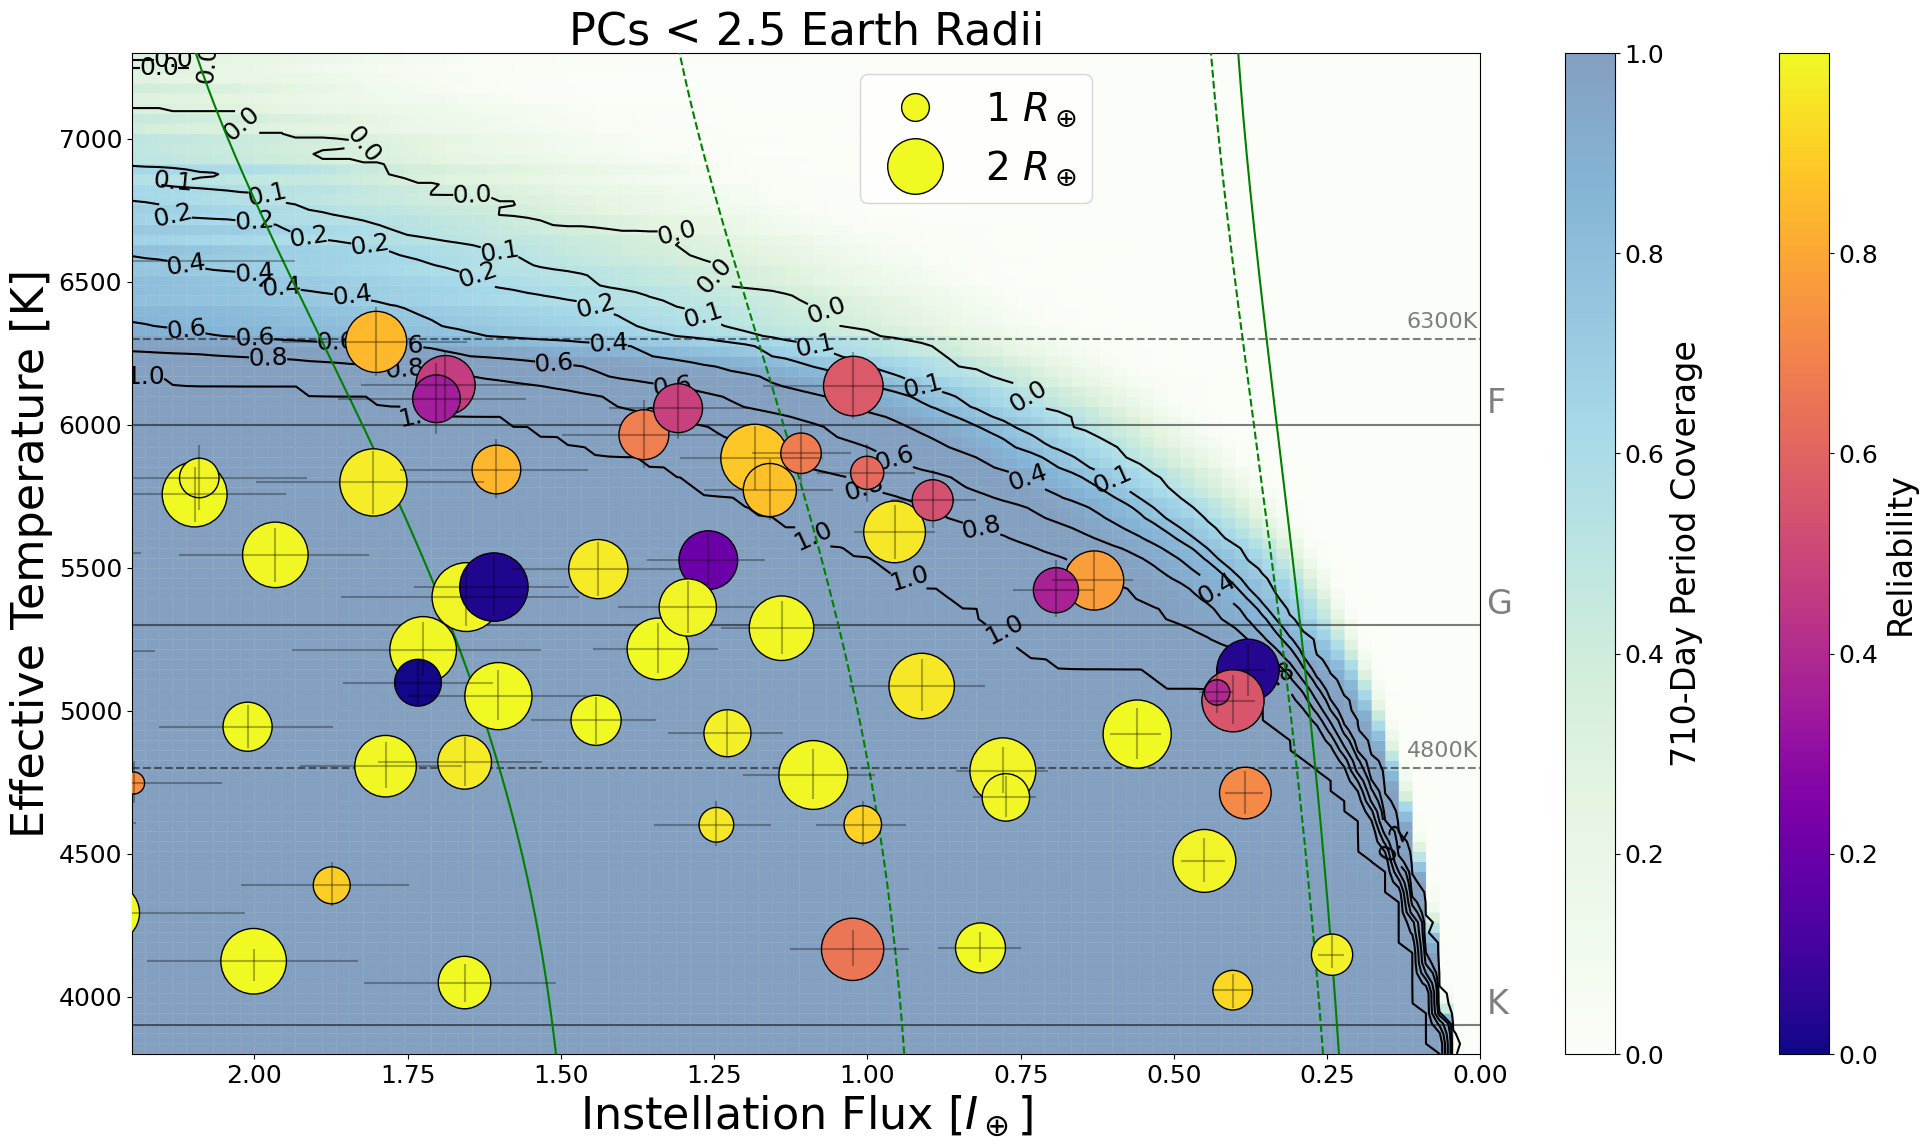

In [314]:
clData = draw_HZ_teff(smallPcs, reliability=True)
plt.savefig(figDir + "/hzPlanetsCompleteness.pdf",bbox_inches='tight')
plt.title("PCs < 2.5 Earth Radii", fontsize = 32);

In [296]:
clData[5]

Text(1.7555555555555555, 6276.090903484725, '0.6')

In [302]:
clData[5].get_position()[0]

1.7555555555555555

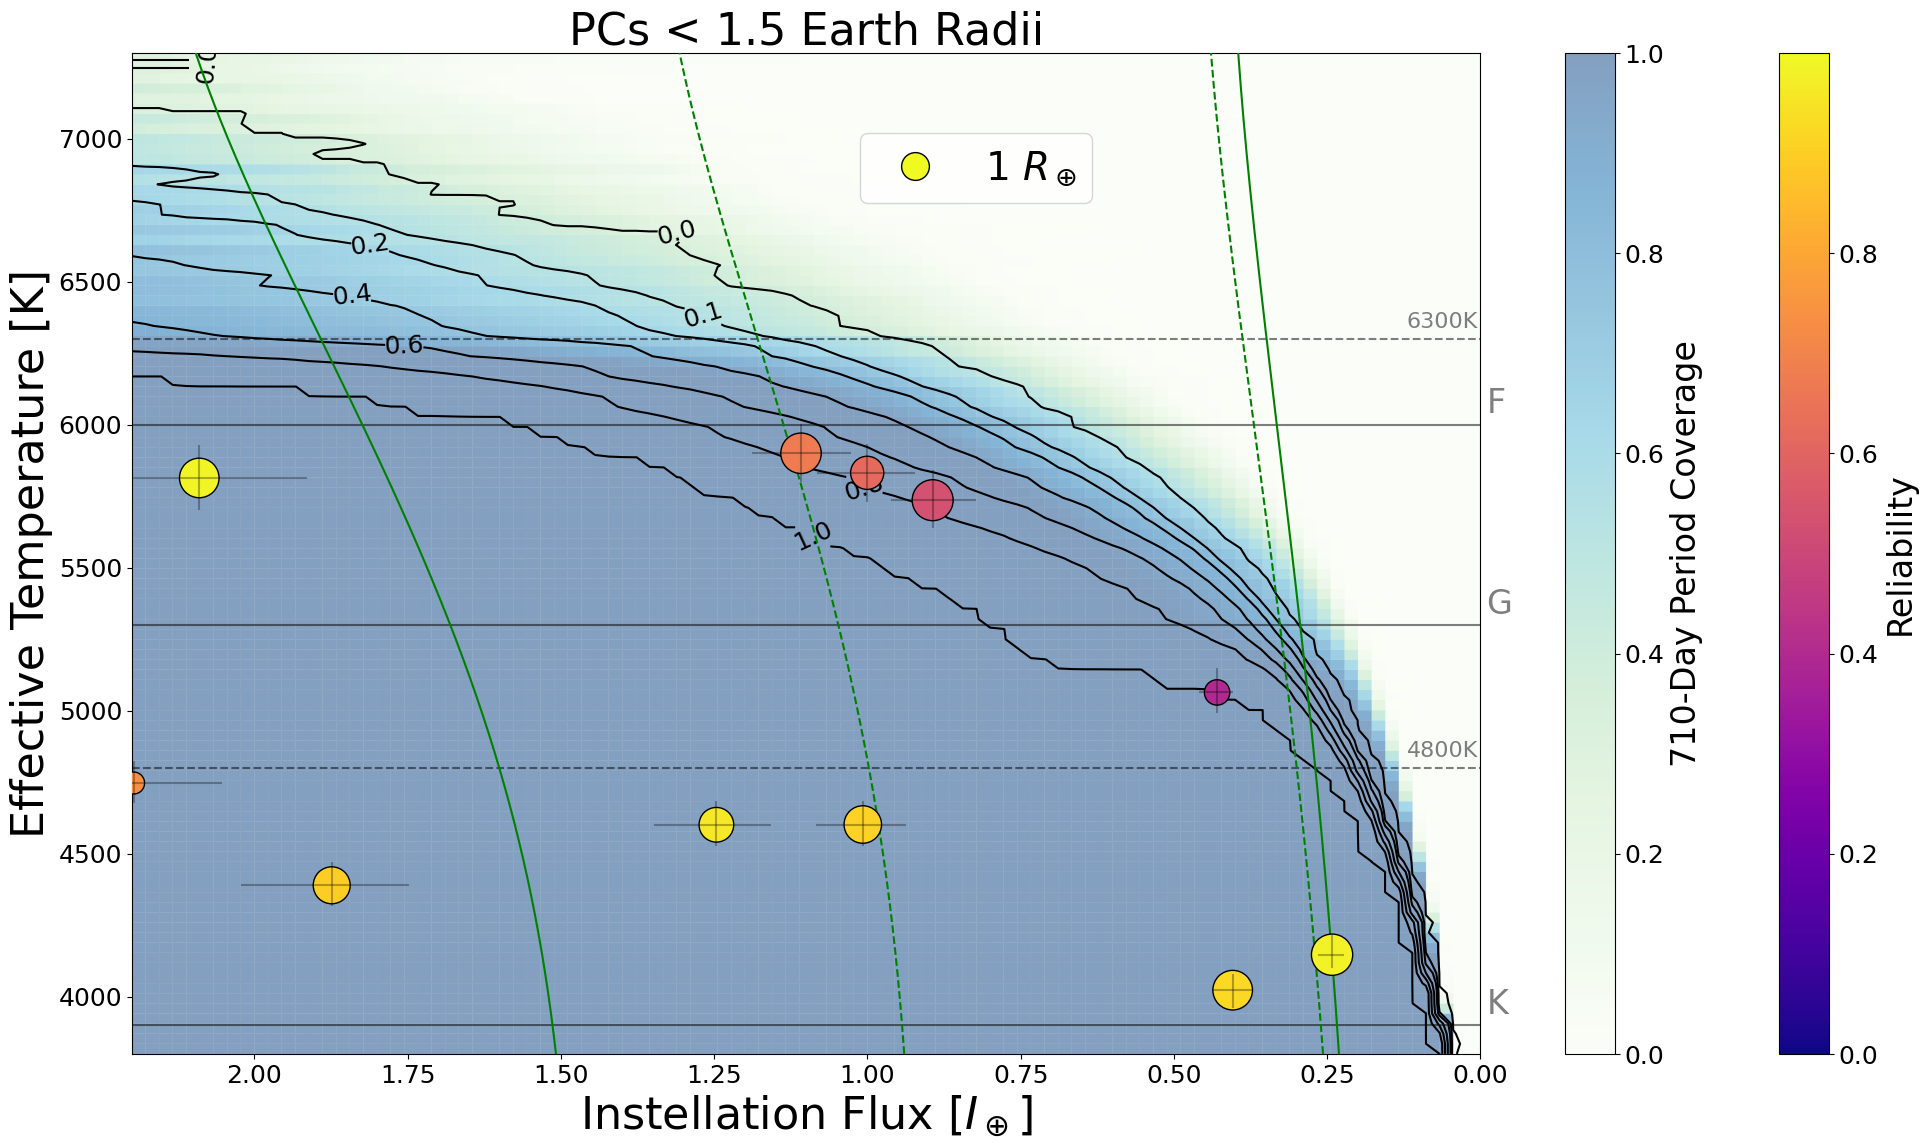

In [18]:
draw_HZ_teff(smallPcs[smallPcs.corrected_prad<=1.5], reliability=True)
plt.title("PCs < 1.5 Earth Radii", fontsize = 32);

In [338]:
def hist_smooth(data, N=100, xType = "log", color='-', alpha=1.0, zorder=100):
    hDat = np.histogram(data, N)
    valX = (hDat[1][0:-1] + hDat[1][1:])/2
    valY = hDat[0]
    valX = np.insert(valX, 0, 0)    
    valY = np.insert(valY, 0, 0)   
    if xType == "log":
        plt.semilogx(valX, valY, color, alpha=alpha);
    elif xType == "linear":
        plt.plot(valX, valY, color, alpha=alpha);
    return np.max(valY)

def cumsum_smooth(data, N=100, xType = "log", color='-', alpha=1.0, zorder=100):
    hDat = np.histogram(data, N)
    valX = (hDat[1][0:-1] + hDat[1][1:])/2
    valY = hDat[0]
    valX = np.insert(valX, 0, 0)    
    valY = np.insert(valY, 0, 0)   
    if xType == "log":
        plt.semilogx(valX, 1 - np.cumsum(valY)/np.sum(valY), color, alpha=alpha);
    elif xType == "linear":
        plt.plot(valX, valY, color, alpha=alpha);
    return np.max(valY)


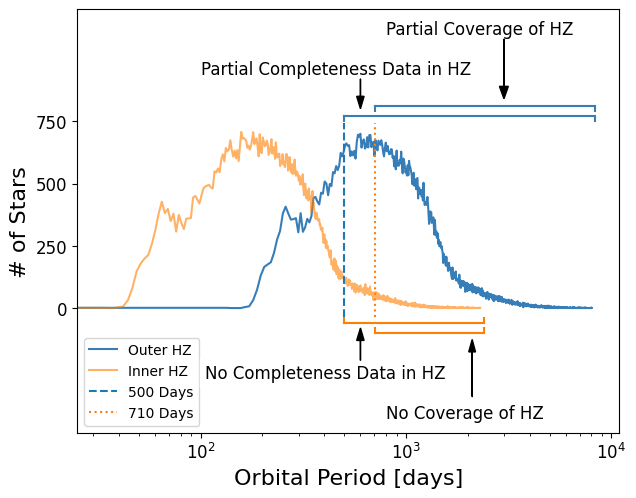

In [386]:
cbc = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.figure(figsize=(7,5.5));
stars = allStars[fgks]
stars.reset_index(inplace=True)
periodAtOuterHZ = np.zeros(len(stars))
periodAtInnerHZ = np.zeros(len(stars))
hzf = rm3D.getHzFlux(stars.teff, hzType="optimistic")
for i, s in stars.iterrows():
    periodAtOuterHZ[i] = period_at_earthflux(s.radius, s.logg, s.teff, hzf[1,i])
    periodAtInnerHZ[i] = period_at_earthflux(s.radius, s.logg, s.teff, hzf[0,i])
# flux10Day.plot.kde(bw_method=0.1);
hist_smooth(periodAtOuterHZ, color=cbc[0], N=1000);
hist_smooth(periodAtInnerHZ, color=cbc[1], N=1000, alpha=0.6);
yl = plt.ylim()
plt.plot([500, 500], yl, "--")
plt.plot([710, 710], yl, ":")
plt.legend(["Outer HZ", "Inner HZ", "500 Days", "710 Days"], loc="lower left");
plt.tick_params(labelsize = 12)
plt.xlabel('Orbital Period [days]', fontsize = 16);
plt.ylabel('# of Stars', fontsize = 16);
# plt.yticks([]);
plt.yticks([0, 250, 500, 750])
plt.ylim(-500, 1200)

plt.plot([500, 2400], [-60, -60], color=cbc[1])
plt.plot([500, 500], [-60, -40], color=cbc[1])
plt.plot([2400, 2400], [-60, -40], color=cbc[1])
plt.text(105, -280, "No Completeness Data in HZ", fontSize=12, backgroundcolor='w', zorder=1110)
plt.arrow(600, -210, 0, 80, head_width=50, head_length=50, fc='k', ec='k', zorder=1110)

plt.plot([710, 2400], [-100, -100], color=cbc[1])
plt.plot([710, 710], [-100, -80], color=cbc[1])
plt.plot([2400, 2400], [-100, -80], color=cbc[1])
plt.text(800, -440, "No Coverage of HZ", fontSize=12, backgroundcolor='w', zorder=1100)
plt.arrow(2100, -356, 0, 180, head_width=160, head_length=50, fc='k', ec='k', zorder=1100)

plt.plot([500, 8300], [770, 770], color=cbc[0])
plt.plot([500, 500], [770, 750], color=cbc[0])
plt.plot([8300, 8300], [770, 750], color=cbc[0])
plt.text(100, 940, "Partial Completeness Data in HZ", fontSize=12, backgroundcolor='w', zorder=1110)
plt.arrow(600, 920, 0, -70, head_width=50, head_length=50, fc='k', ec='k', zorder=1110)


plt.plot([710, 8300], [810, 810], color=cbc[0])
plt.plot([710, 710], [810, 790], color=cbc[0])
plt.plot([8300, 8300], [810, 790], color=cbc[0])
plt.text(800, 1100, "Partial Coverage of HZ", fontSize=12, backgroundcolor='w', zorder=1100)
plt.arrow(3000, 1080, 0, -190, head_width=300, head_length=50, fc='k', ec='k', zorder=1100)

plt.savefig(figDir + "/periodCoverage.pdf",bbox_inches='tight')


In [366]:
hzf.shape

(2, 100518)

In [377]:
stars

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,feh_DR25,feh_DR25_err1,feh_DR25_err2,limbdark_coeff1_DR25,limbdark_coeff2_DR25,limbdark_coeff3_DR25,limbdark_coeff4_DR25,teffR,teffG,teffB
0,10000800,2MASS J19065751+4657575,5362.790997,96.077786,92.381055,4.493869,0.039715,0.047158,-0.008651,0.135345,...,-0.04,0.30,-0.30,0.5107,0.0402,0.4845,-0.2827,1.000000,0.506663,0.160164
1,10000827,2MASS J19065980+4657282,5390.030248,98.412541,94.178433,4.432616,0.041901,0.043897,0.164622,0.133964,...,-0.10,0.30,-0.30,0.4983,0.0703,0.4526,-0.2695,1.000000,0.527551,0.181800
2,10000876,2MASS J19070870+4657343,5118.260934,88.513015,80.122690,4.493281,0.037809,0.031151,0.050301,0.133487,...,0.18,0.20,-0.25,0.6581,-0.5152,1.1843,-0.5207,1.000000,0.527552,0.181801
3,10000939,2MASS J19071625+4657231,4258.903811,81.515773,73.781117,4.663410,0.018230,0.022328,-0.109383,0.113421,...,-0.50,0.30,-0.30,0.6211,-0.1986,0.5961,-0.1968,1.000000,0.527634,0.181891
4,10000941,2MASS J19071664+4654420,4871.837730,74.785174,70.391382,4.580680,0.017029,0.026598,0.123273,0.110771,...,0.08,0.25,-0.25,0.6428,-0.5256,1.2195,-0.5287,1.000000,0.529599,0.184033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105113,9999869,2MASS J19043972+4657400,5881.869860,97.423505,96.483719,4.473559,0.020181,0.030934,-0.103952,0.113453,...,-0.10,0.25,-0.35,0.4017,0.5284,-0.2349,0.0169,0.882517,0.882041,1.000000
105114,9999901,2MASS J19044516+4659174,4822.877881,74.997305,69.956807,4.580448,0.021829,0.027825,0.024773,0.108351,...,0.28,0.15,-0.30,0.6839,-0.6343,1.3179,-0.5448,0.882483,0.882019,1.000000
105115,9999914,2MASS J19044683+4655410,5834.455783,103.157249,99.878332,4.495844,0.027364,0.037503,-0.167939,0.133097,...,0.00,0.25,-0.30,0.4158,0.4948,-0.1939,-0.0009,0.882390,0.881958,1.000000
105116,9999949,2MASS J19045272+4656462,5770.697389,112.039191,107.797787,4.302359,0.061843,0.061606,0.022115,0.141951,...,0.02,0.25,-0.30,0.4128,0.5234,-0.2447,0.0222,0.882341,0.881927,1.000000


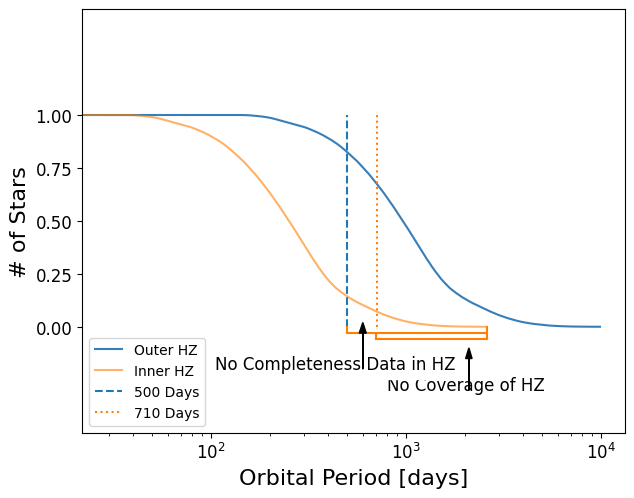

In [362]:
cbc = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.figure(figsize=(7,5.5));
periodAtOuterHZ = period_at_earthflux(allStars[fgks].radius, allStars[fgks].logg, allStars[fgks].teff, 0.3)
periodAtInnerHZ = period_at_earthflux(allStars[fgks].radius, allStars[fgks].logg, allStars[fgks].teff, 1.8)
# flux10Day.plot.kde(bw_method=0.1);
cumsum_smooth(periodAtOuterHZ, color=cbc[0], N=1000);
cumsum_smooth(periodAtInnerHZ, color=cbc[1], N=1000, alpha=0.6);
yl = plt.ylim()
plt.plot([500, 500], [0,1], "--")
plt.plot([710, 710], [0,1], ":")
plt.legend(["Outer HZ", "Inner HZ", "500 Days", "710 Days"], loc="lower left");
plt.tick_params(labelsize = 12)
plt.xlabel('Orbital Period [days]', fontsize = 16);
plt.ylabel('# of Stars', fontsize = 16);
# plt.yticks([]);
plt.yticks([0, 0.250, 0.500, 0.750, 1])
plt.ylim(-0.5, 1.5)

plt.plot([500, 2600], [-0.03, -0.03], color=cbc[1])
plt.plot([500, 500], [-0.03, 0], color=cbc[1])
plt.plot([2600, 2600], [-0.03, 0], color=cbc[1])
plt.text(105, -0.2, "No Completeness Data in HZ", fontSize=12, backgroundcolor='w', zorder=1110)
plt.arrow(600, -0.2, 0, 0.17, head_width=50, head_length=0.05, fc='k', ec='k', zorder=1110)

plt.plot([700, 2600], [-0.06, -0.06], color=cbc[1])
plt.plot([700, 700], [-0.06, -0.033], color=cbc[1])
plt.plot([2600, 2600], [-0.06, -0.033], color=cbc[1])
plt.text(800, -0.3, "No Coverage of HZ", fontSize=12, backgroundcolor='w', zorder=1100)
plt.arrow(2100, -0.3, 0, 0.15, head_width=160, head_length=0.05, fc='k', ec='k', zorder=1100)

# plt.plot([500, 10000], [850, 850], color=cbc[0])
# plt.plot([500, 500], [850, 830], color=cbc[0])
# plt.plot([10000, 10000], [850, 830], color=cbc[0])
# plt.text(100, 1020, "Partial Completeness Data in HZ", fontSize=12, backgroundcolor='w', zorder=1110)
# plt.arrow(600, 1000, 0, -70, head_width=50, head_length=50, fc='k', ec='k', zorder=1110)


# plt.plot([700, 10000], [890, 890], color=cbc[0])
# plt.plot([700, 700], [890, 870], color=cbc[0])
# plt.plot([10000, 10000], [890, 870], color=cbc[0])
# plt.text(800, 1180, "Partial Coverage of HZ", fontSize=12, backgroundcolor='w', zorder=1100)
# plt.arrow(3000, 1160, 0, -190, head_width=300, head_length=50, fc='k', ec='k', zorder=1100)

# plt.savefig(figDir + "/periodCoverage.pdf",bbox_inches='tight')


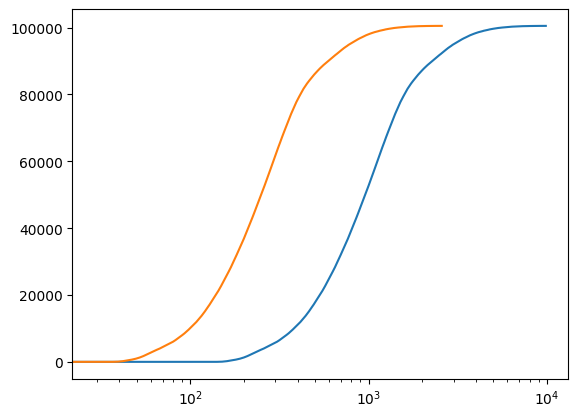

In [330]:
cumsum_smooth(periodAtOuterHZ, 1000);
cumsum_smooth(periodAtInnerHZ, 1000);

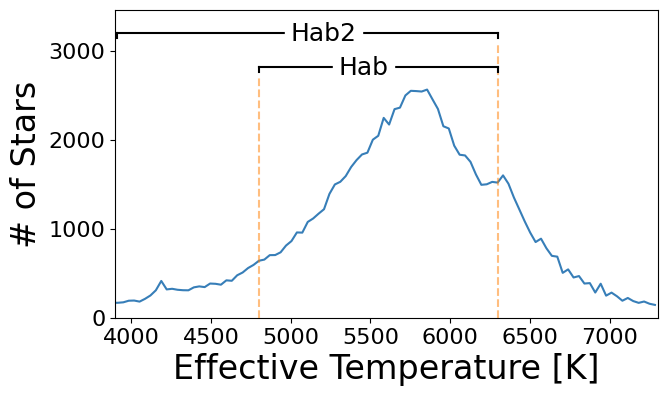

In [270]:
plt.figure(figsize=(7,4));
maxy = hist_smooth(allStars[fgks].teff, xType = "linear", color=cbc[0], N=100, zorder=1110);
plt.xlabel("Effective Temperature [K]", fontsize = 24)
plt.ylabel("# of Stars", fontsize = 24)
plt.xlim(3900, 7300)
plt.ylim(0, 1.35*maxy)

l1y = 1.25*maxy
l2y = 1.1*maxy
endLength = 60
plt.plot([3900, 6300], [l1y, l1y], color='k', zorder=1110)
plt.plot([3910, 3910], [l1y, l1y - endLength], color='k', zorder=1110)
plt.plot([6300, 6300], [l1y, l1y - endLength], color='k', zorder=1110)
plt.text(5000, l1y-95, "Hab2", fontSize=18, backgroundcolor='w', zorder=1110)

plt.plot([4800, 6300], [l2y, l2y], color='k', zorder=1110)
plt.plot([4800, 4800], [l2y, l2y - endLength], color='k', zorder=1110)
plt.plot([6300, 6300], [l2y, l2y - endLength], color='k', zorder=1110)
plt.text(5300, l2y-95, "Hab", fontSize=18, backgroundcolor='w', zorder=1110)

plt.plot([6300, 6300], [0, l1y - 2*endLength], color = cbc[1], ls = '--', alpha = 0.5, zorder=110)
plt.plot([4800, 4800], [0, l2y - 2*endLength], color = cbc[1], ls = '--', alpha = 0.5, zorder=110)

plt.tick_params(labelsize = 16)
plt.savefig(figDir + "/stellarTeffDist.pdf",bbox_inches='tight')


In [21]:
period_at_earthflux(1, 4.437, 5780, 0.3)

901.9868090079501

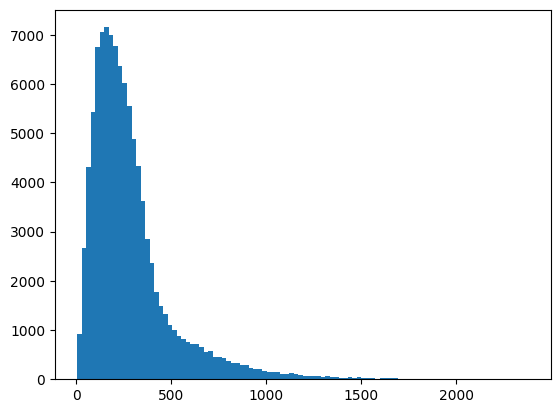

In [22]:
flux10Day = period_at_earthflux(allStars.radius, allStars.logg, allStars.teff, 2.0)
plt.hist(flux10Day, 100);


In [23]:
flux500DayF = earthflux_at_period(allStars[fs].radius, allStars[fs].logg, allStars[fs].teff, 500)
flux500DayG = earthflux_at_period(allStars[gs].radius, allStars[gs].logg, allStars[gs].teff, 500)
flux500DayK = earthflux_at_period(allStars[ks].radius, allStars[ks].logg, allStars[ks].teff, 500)


Text(0.5, 0, 'Instellation Flux [$F_\\oplus$]')

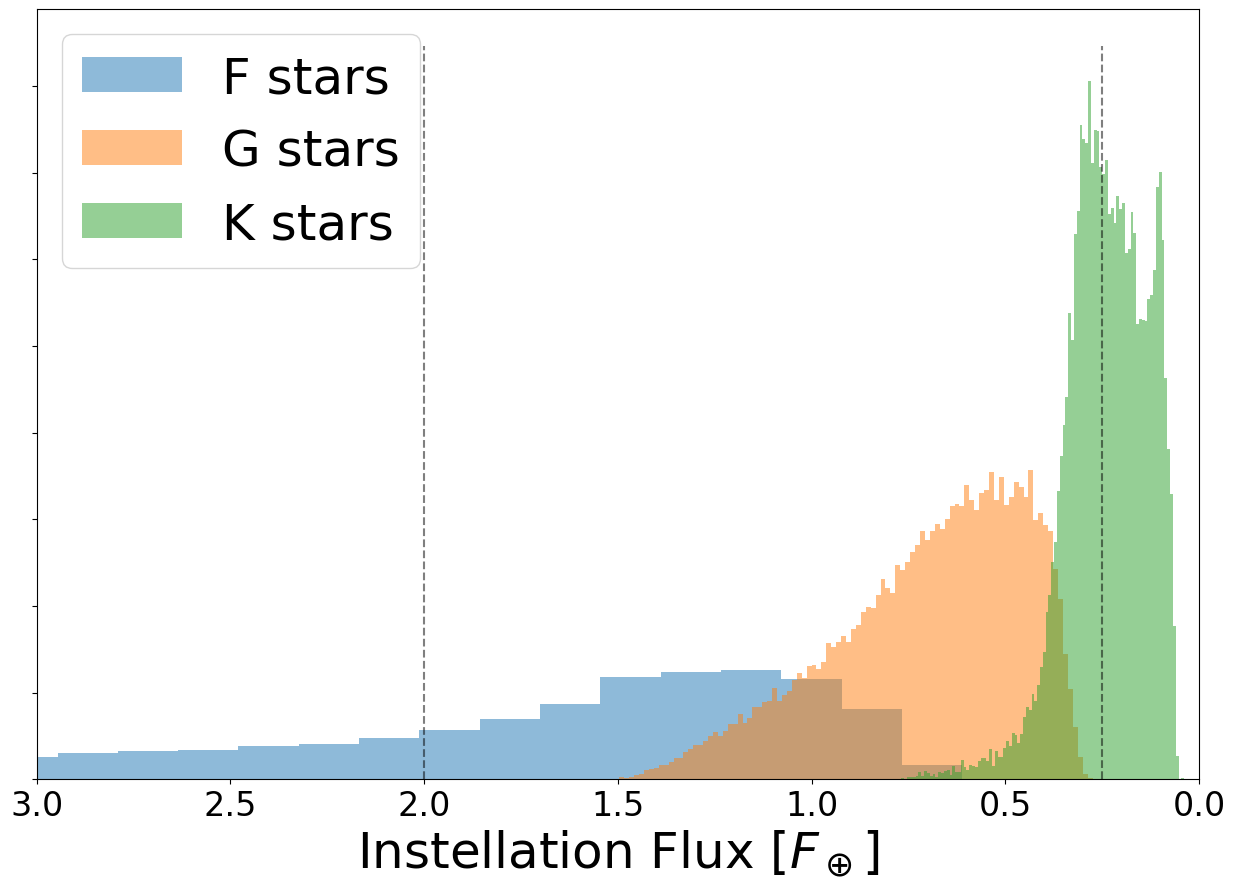

In [24]:
plt.figure(figsize=(15,10));
plt.hist(flux500DayF, 100, density=True, alpha = 0.5);
plt.hist(flux500DayG, 100, density=True, alpha = 0.5);
plt.hist(flux500DayK, 100, density=True, alpha = 0.5);
plt.legend(["F stars", "G stars", "K stars"], fontsize=36)
yl = plt.ylim()
plt.plot([0.25, 0.25], yl, color='k', linestyle='--', alpha = 0.5, zorder=10)
plt.plot([2, 2], yl, color='k', linestyle='--', alpha = 0.5, zorder=10)

plt.xlim(3, 0);
plt.gca().set_yticklabels([])
plt.tick_params(labelsize = 24)
plt.xlabel("Instellation Flux [$F_\oplus$]", fontsize=36)


[ 1.79897155 -0.74143842]


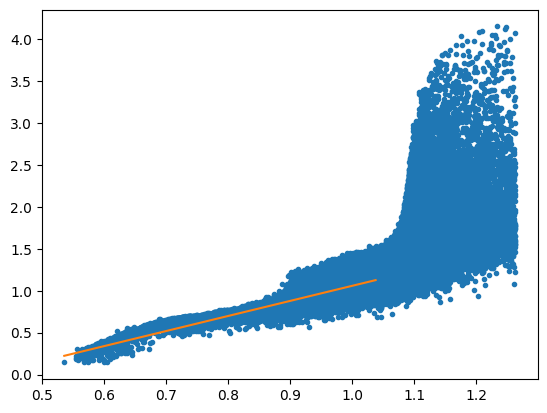

In [25]:
pf = np.polyfit(allStars.teff[allStars.teff<6000]/5780, allStars.radius[allStars.teff<6000], 1)
x = np.linspace(np.min(allStars[allStars.teff<6000].teff/5780), np.max(allStars[allStars.teff<6000].teff/5780))
rf = np.polyval(pf, x)
plt.plot(allStars.teff/5780, allStars.radius, '.')
plt.plot(x,rf)
print(pf)

In [26]:
1.95/np.sqrt(0.25)

3.9

In [27]:
1.95/np.sqrt(1.8)

1.4534441853748632

In [28]:
T = 4800/5780
ain = T**3/np.sqrt(0.25)
aout = T**3/np.sqrt(1.6)
T0 = ain - aout
print("ain = " + str(ain) + ", aout = " + str(aout) + ", width = " + str(T0))

ain = 1.145434322735649, aout = 0.45277267124713, width = 0.6926616514885189


In [29]:
T = 6300/5780
ain = T**3/np.sqrt(0.25)
aout = T**3/np.sqrt(1.8)
T1 = ain - aout
print("ain = " + str(ain) + ", aout = " + str(aout) + ", width = " + str(T1))

ain = 2.589811343470422, aout = 0.9651657021499865, width = 1.6246456413204355


In [30]:
T1/T0

2.3455111710444743

In [31]:
6300/4800

1.3125

[0.8155593  0.01271752]
1.1825650649720276


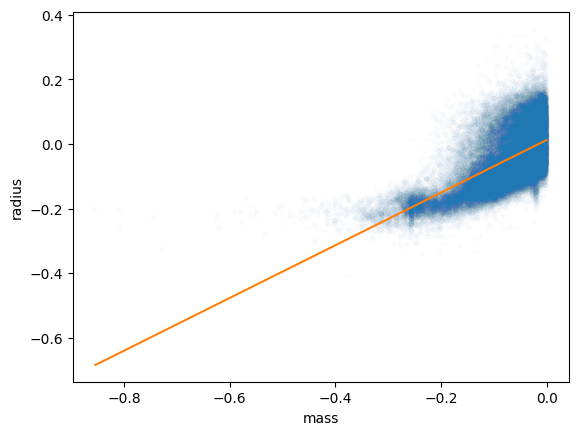

In [32]:
ourStars = (allStars.teff>3900)&(allStars.teff<6300)&(allStars.mass<1)
plt.plot(np.log10(allStars[ourStars].mass), np.log10(allStars[ourStars].radius), '.', alpha=0.01)
pf = np.polyfit(np.log10(allStars[ourStars].mass), np.log10(allStars[ourStars].radius), 1)
x = np.linspace(np.min(np.log10(allStars[ourStars].mass)), np.max(np.log10(allStars[ourStars].mass)))
rf = np.polyval(pf, x)
plt.plot(x,rf)
plt.xlabel("mass")
plt.ylabel("radius")
print(pf)
print(2-2/(3*pf[0]))

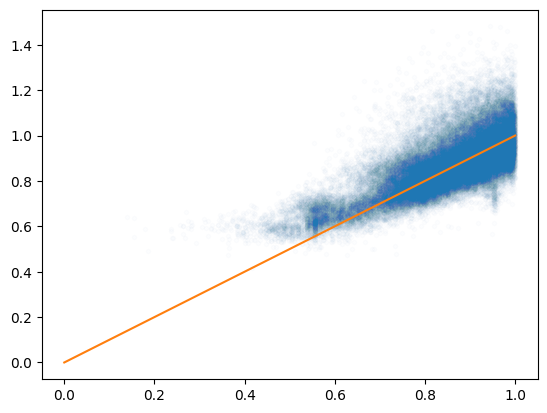

In [33]:
plt.plot(allStars[ourStars].mass, allStars[ourStars].iso_mass, '.', alpha=0.01)
plt.plot([0,1], [0,1])

In [34]:
a = -0.8
3.*(a+7./3.)/4.

1.1500000000000001

In [35]:
a = -0.8
(3*a/2+7./2.)

2.3

In [36]:
np.exp((270-260)/2)

148.4131591025766

In [37]:
hz3900 = rm3D.getHzFlux(3900, hzType = "optimistic")
hz6300 = rm3D.getHzFlux(6300, hzType = "optimistic")

In [38]:
print("3900K: " + str(1/np.sqrt(hz3900[1]) - 1/np.sqrt(hz3900[0])))
print("6300K: " + str(1/np.sqrt(hz6300[1]) - 1/np.sqrt(hz6300[0])))

3900K: [1.25470755]
6300K: [0.9661315]


In [39]:
hz3900

array([[1.51377771],
       [0.23394695]])

In [40]:
hz6300

array([[1.89182189],
       [0.34881628]])

In [41]:
fluxSAG13HzHigh = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 222.65)
fluxSAG13HzLow = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 808.84)
fluxZetaEarthHigh = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 0.8*365.4)
fluxZetaEarthLow = earthflux_at_period(allStars.radius, allStars.logg, allStars.teff, 1.2*365.4)


In [42]:
cbc = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

def draw_HZ_period(planets, reliability=False):

    plt.style.use('default')
    plt.figure(figsize=(16,13));

    t = np.linspace(3800, 7300, 1000)
    optHz = rm3D.getHzFlux(t, hzType = "optimistic")
    plt.plot(optHz[0,:], t, color='g', lw=2, zorder=110)
    plt.plot(optHz[1,:], t, color='g', lw=2, zorder=110)
    conHz = rm3D.getHzFlux(t, hzType = "conservative")
    plt.plot(conHz[0,:], t, color='g', lw=2, linestyle='--', zorder=110)
    plt.plot(conHz[1,:], t, color='g', lw=2, linestyle='--', zorder=110)
    if reliability:
        colorData = np.array(planets.totalReliability)
        cbLabel = "Reliability"
    else:
        colorData = np.array(planets.gaia_iso_prad)
        cbLabel = "Planet Radius [$R_\oplus$]"

    insol = np.array(planets.insolation)
    teff = np.array(planets.teff)
    rad = np.array(planets.gaia_iso_prad)
    sIdx = np.flip(np.argsort(rad))
    scp = plt.scatter(insol[sIdx], teff[sIdx], cmap="plasma", 
                   c='bisque', edgecolors='k', s=100*rad[sIdx]**2, alpha = 1.0, zorder=100)
#     cbh = plt.colorbar(scp)
#     cbh.ax.set_ylabel(cbLabel, fontSize = 24);
#     cbh.ax.tick_params(labelsize=18)
#     plt.scatter(1, 5780, marker="$\oplus$", c='k', s=400, alpha = 0.5, zorder=101)

    plt.errorbar((fluxSAG13HzLow+fluxSAG13HzHigh)/2, allStars.teff, xerr=(fluxSAG13HzLow-fluxSAG13HzHigh)/2, 
                 c=cbc[0], fmt="none", alpha=0.01, zorder=1)
    plt.errorbar((fluxZetaEarthLow+fluxZetaEarthHigh)/2, allStars.teff, xerr=(fluxZetaEarthLow-fluxZetaEarthHigh)/2, 
                 c='w', fmt="none", alpha=0.03, zorder=2)
    plt.errorbar((fluxZetaEarthLow+fluxZetaEarthHigh)/2, allStars.teff, xerr=(fluxZetaEarthLow-fluxZetaEarthHigh)/2, 
                 c=cbc[1], fmt="none", alpha=0.01, zorder=3)

    
#     plt.scatter(fluxSAG13HzLow, allStars.teff, cmap=teffCmap, c=cbc[0], s=1, alpha=0.1, zorder=7)
#     plt.scatter(fluxSAG13HzHigh, allStars.teff, cmap=teffCmap, c=cbc[0], s=1, alpha=0.1, zorder=7)
#     plt.scatter(fluxZetaEarthLow, allStars.teff, cmap=teffCmap, c=cbc[1], s=1, alpha=0.1, zorder=7)
#     plt.scatter(fluxZetaEarthHigh, allStars.teff, cmap=teffCmap, c=cbc[1], s=1, alpha=0.1, zorder=7)
    
#     plt.plot([1, 1], [np.min(allStars.teff), np.max(allStars.teff)], color='r', linestyle='--', alpha = 0.5, zorder=10)
#     plt.plot(rm3D.getHzFlux(5778.0, hzType = "optimistic"), [5778.0, 5778.0], color='r', linestyle='--', alpha = 0.5, zorder=10)

    plt.plot([2.2, 0], [6000, 6000], color='k', linestyle='-', alpha=0.5, zorder=10)
    plt.plot([2.2, 0], [5300, 5300], color='k', linestyle='-', alpha=0.5, zorder=10)
    plt.plot([2.2, 0], [3900, 3900], color='k', linestyle='-', alpha=0.5, zorder=10)
    plt.plot([2.2, 0], [4800, 4800], color='k', linestyle='--', alpha=0.5, zorder=10)
    plt.plot([2.2, 0], [6300, 6300], color='k', linestyle='--', alpha=0.5, zorder=10)
    plt.xlim(2.2, 0);
    plt.ylim(3800, 7300);
    txtX = -.01
    txtDeltaY = 40
    ylim = plt.ylim();
    plt.text(txtX, 6000+txtDeltaY, "F", alpha=0.5, fontSize=24);
    plt.text(txtX, 5300+txtDeltaY, "G", alpha=0.5, fontSize=24);
    plt.text(txtX, 3900+txtDeltaY, "K", alpha=0.5, fontSize=24);
    plt.text(.12, 4800+txtDeltaY, "4800K", alpha=0.5, fontSize=16);
    plt.text(.12, 6300+txtDeltaY, "6300K", alpha=0.5, fontSize=16);
    plt.tick_params(labelsize = 24)
    
    kw = dict(prop="sizes", num=[1,2], color='bisque', fmt="{x:.0f} $R_\oplus$", markeredgecolor='k',
          func=lambda s: np.sqrt(s/100))
    legend2 = plt.legend(*scp.legend_elements(**kw), loc=[0.17,0.875], fontsize=24, framealpha=0.6)
    
    plt.text(1.26, 7100, "SAG13 HZ Orbital Periods", fontSize=32, backgroundcolor='w', zorder=1000)
    plt.arrow(1.1, 7050, 0, -550, head_width=0.05, head_length=100, fc='k', ec='k', zorder=1000)
    plt.text(0.9, 6850, "$\zeta_\oplus$ Orbital Periods", fontSize=32, backgroundcolor='w', zorder=1000)
    plt.arrow(0.8, 6800, 0, -1000, head_width=0.05, head_length=100, fc='k', ec='k', zorder=1000)

    plt.xlabel('Instellation Flux [$I_\oplus$]', fontsize = 32);
    plt.ylabel('Effective Temperature [K]', fontsize = 32);


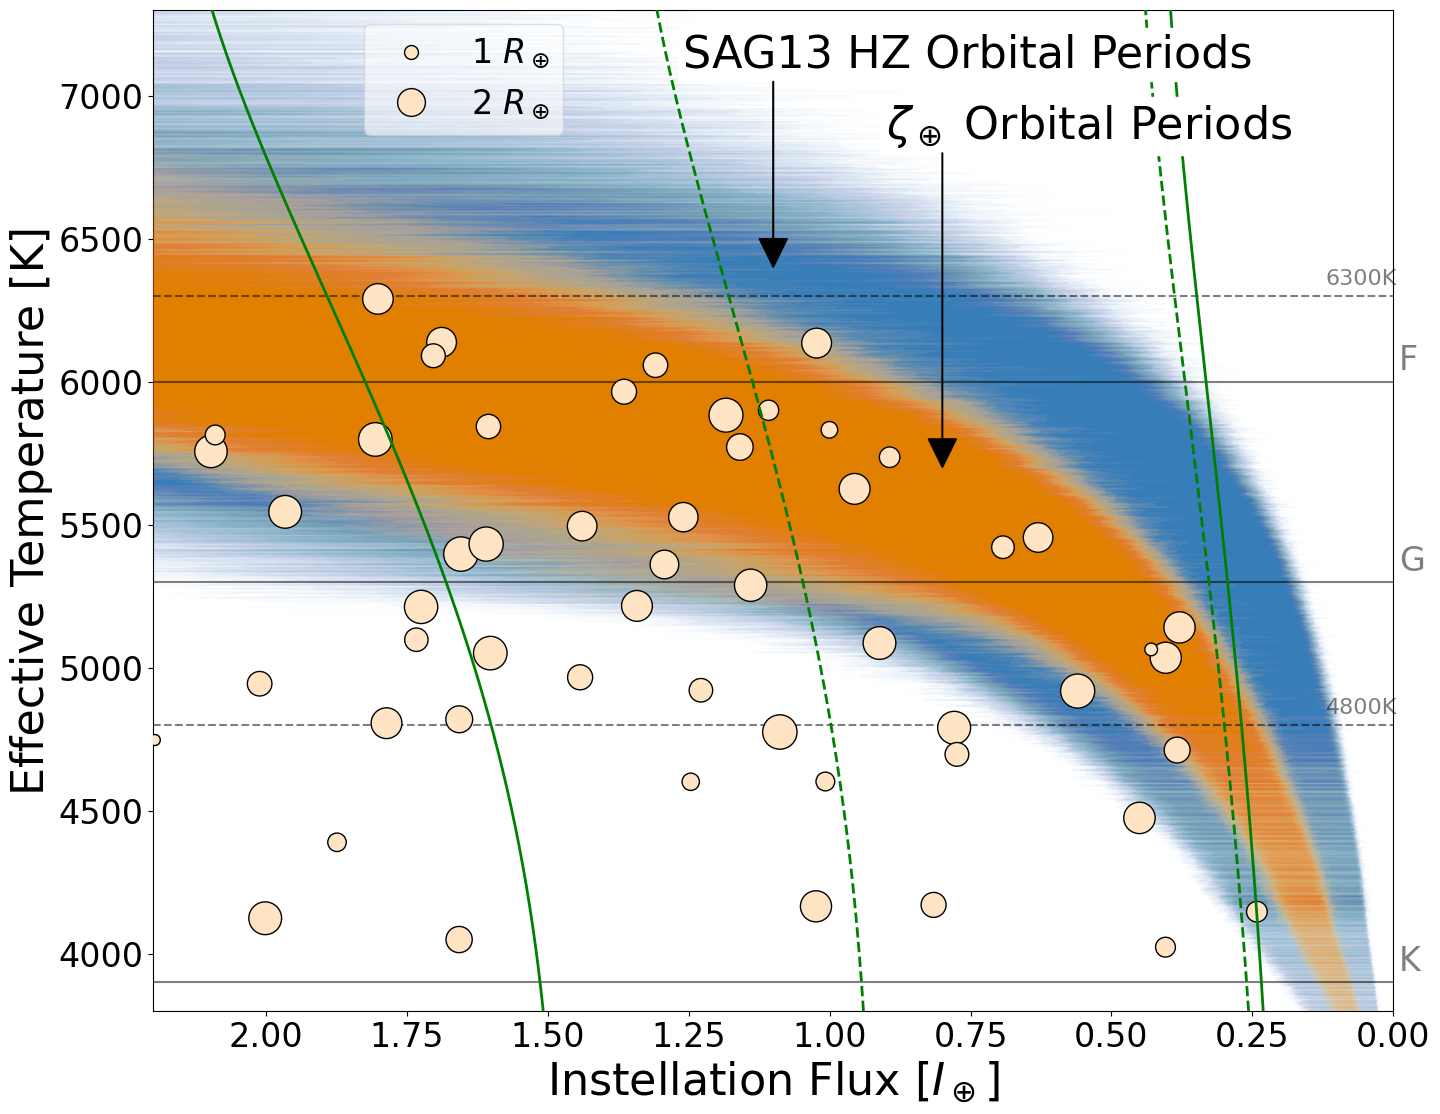

In [43]:
draw_HZ_period(smallPcs, reliability=False)
plt.savefig(figDir + "/fluxPeriod.png",bbox_inches='tight')



In [44]:
fluxSAG13HzLow.shape

(102071,)

In [45]:
list(allStars)

['kepid',
 'tm_designation',
 'teff',
 'teff_err1',
 'teff_err2',
 'logg',
 'logg_err1',
 'logg_err2',
 'feh',
 'feh_err1',
 'feh_err2',
 'mass',
 'mass_err1',
 'mass_err2',
 'radius',
 'radius_err1',
 'radius_err2',
 'dens',
 'dens_err1',
 'dens_err2',
 'prov_sec',
 'kepmag',
 'limbdark_coeff1',
 'limbdark_coeff2',
 'limbdark_coeff3',
 'limbdark_coeff4',
 'dist',
 'dist_err1',
 'dist_err2',
 'nconfp',
 'nkoi',
 'ntce',
 'datalink_dvr',
 'st_delivname',
 'st_vet_date_str',
 'ra',
 'dec',
 'st_quarters',
 'teff_prov',
 'logg_prov',
 'feh_prov',
 'jmag',
 'jmag_err',
 'hmag',
 'hmag_err',
 'kmag',
 'kmag_err',
 'dutycycle',
 'dataspan',
 'mesthres01p5',
 'mesthres02p0',
 'mesthres02p5',
 'mesthres03p0',
 'mesthres03p5',
 'mesthres04p5',
 'mesthres05p0',
 'mesthres06p0',
 'mesthres07p5',
 'mesthres09p0',
 'mesthres10p5',
 'mesthres12p0',
 'mesthres12p5',
 'mesthres15p0',
 'rrmscdpp01p5',
 'rrmscdpp02p0',
 'rrmscdpp02p5',
 'rrmscdpp03p0',
 'rrmscdpp03p5',
 'rrmscdpp04p5',
 'rrmscdpp05p0',


In [46]:
N = 100
teff = np.zeros(len(allStars))
optHzLow = np.zeros((len(allStars), N))
optHzHigh = np.zeros((len(allStars), N))
consHzLow = np.zeros((len(allStars), N))
consHzHigh = np.zeros((len(allStars), N))
f = FloatProgress(min=0, max=N)
display(f)
for i in range(N):
    plusErr = np.random.rand(len(allStars)) > 0.5
    minusErr = plusErr == False
    teff[plusErr] = allStars[plusErr].teff + allStars[plusErr].teff_err1*np.random.randn(sum(plusErr))
    teff[minusErr] = allStars[minusErr].teff - allStars[minusErr].teff_err2*np.random.randn(sum(minusErr))  
    optHz = rm3D.getHzFlux(teff, hzType = "optimistic")
    optHzHigh[:,i] = optHz[1,:]
    optHzLow[:,i] = optHz[0,:]
    consHz = rm3D.getHzFlux(teff, hzType = "conservative")
    consHzHigh[:,i] = consHz[1,:]
    consHzLow[:,i] = consHz[0,:]
    f.value += 1


FloatProgress(value=0.0)

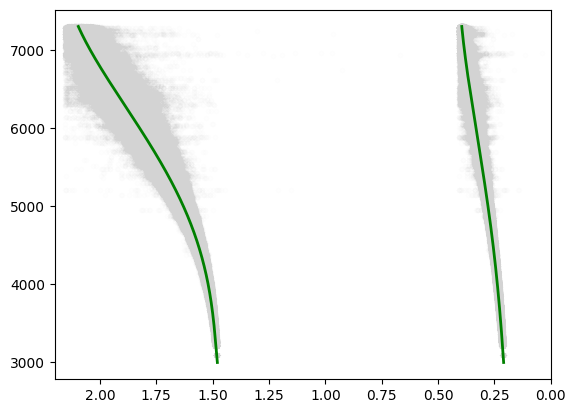

In [47]:
plt.plot(optHzHigh, allStars.teff, '.', optHzLow, allStars.teff, '.', color="lightgrey", alpha=0.01)
plt.xlim(2.2, 0);
t = np.linspace(3000, 7300, 1000)
optHz = rm3D.getHzFlux(t, hzType = "optimistic")
plt.plot(optHz[0,:], t, color='g', lw=2, zorder=110)
plt.plot(optHz[1,:], t, color='g', lw=2, zorder=110)


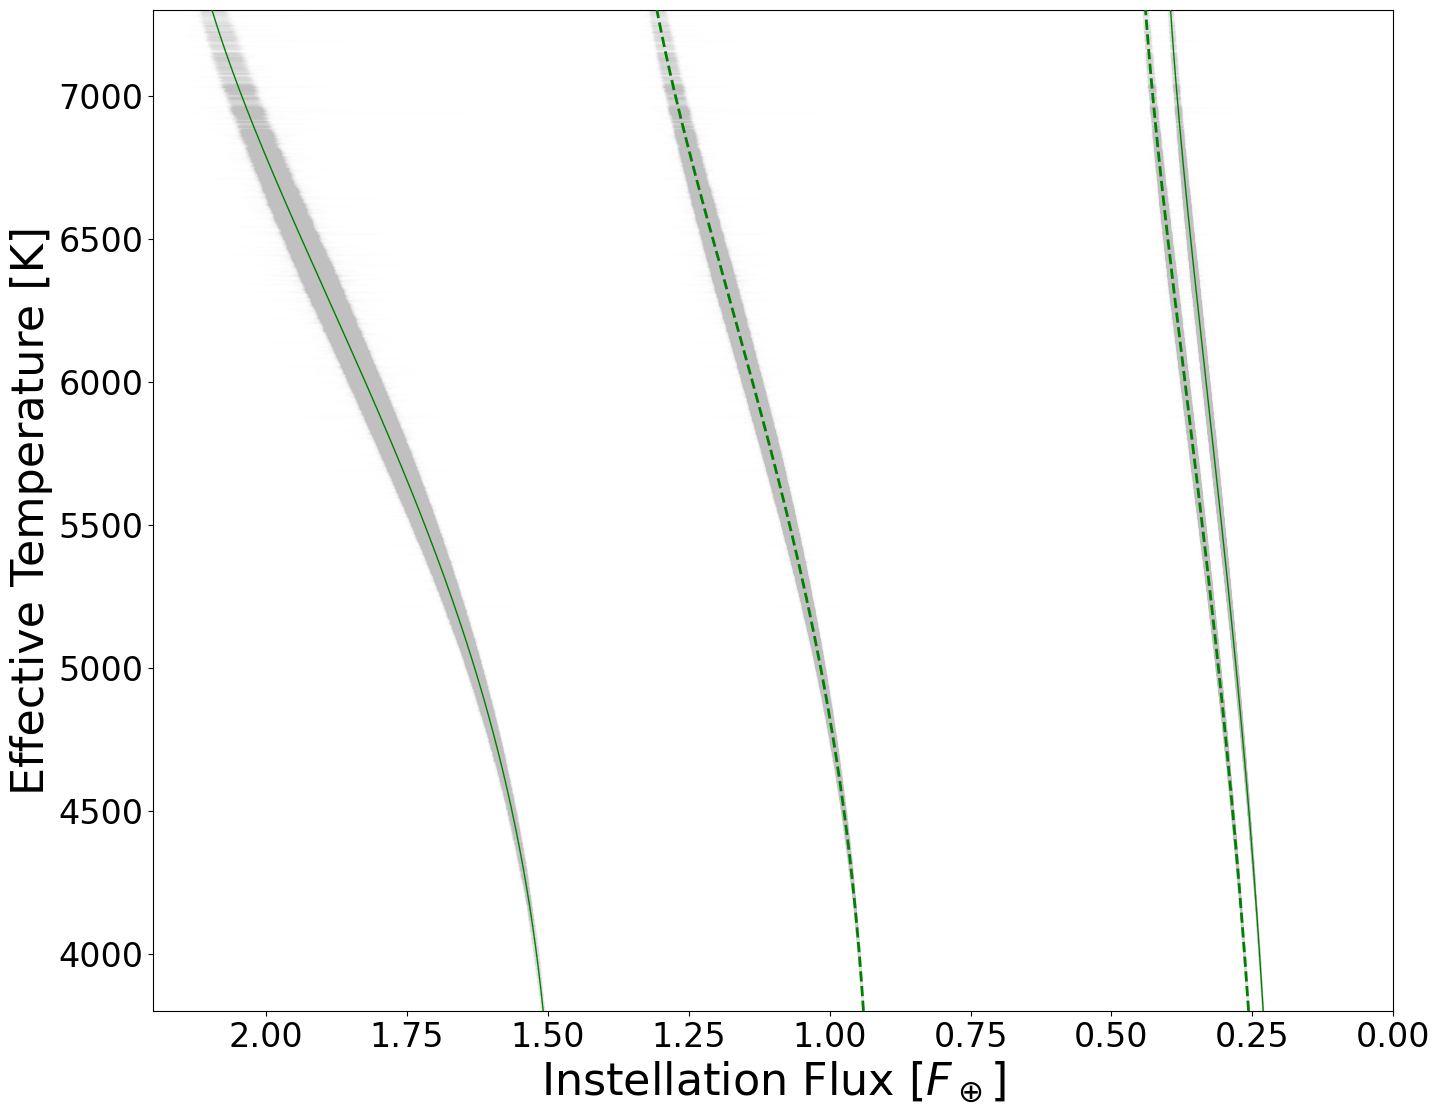

In [48]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize=(16,13));
optHzHighms, optHzHighmed, optHzHighps = np.percentile(optHzHigh, [16, 50, 84], axis=1)
optHzLowms, optHzLowmed, optHzLowps = np.percentile(optHzLow, [16, 50, 84], axis=1)
consHzHighms, consHzHighmed, consHzHighps = np.percentile(consHzHigh, [16, 50, 84], axis=1)
consHzLowms, consHzLowmed, consHzLowps = np.percentile(consHzLow, [16, 50, 84], axis=1)
plt.errorbar(optHzHighmed, allStars.teff, xerr=[optHzHighmed-optHzHighms,optHzHighps-optHzHighmed], fmt="none", color="silver", alpha=0.01)
plt.errorbar(optHzLowmed, allStars.teff, xerr=[optHzLowmed-optHzLowms,optHzLowps-optHzLowmed], fmt="none", color="silver", alpha=0.01)
plt.errorbar(consHzHighmed, allStars.teff, xerr=[consHzHighmed-consHzHighms,consHzHighps-consHzHighmed], fmt="none", color="silver", alpha=0.01)
plt.errorbar(consHzLowmed, allStars.teff, xerr=[consHzLowmed-consHzLowms,consHzLowps-consHzLowmed], fmt="none", color="silver", alpha=0.01)
plt.xlim(2.2, 0);
plt.ylim(3800, 7300);
t = np.linspace(3800, 7300, 1000)
optHz = rm3D.getHzFlux(t, hzType = "optimistic")
plt.plot(optHz[0,:], t, color='g', lw=1, alpha=1, zorder=110);
plt.plot(optHz[1,:], t, color='g', lw=1, alpha=1, zorder=110);
consHz = rm3D.getHzFlux(t, hzType = "conservative")
plt.plot(consHz[0,:], t, color='g', linestyle='--', lw=2, alpha=1, zorder=110);
plt.plot(consHz[1,:], t, color='g', linestyle='--', lw=2, alpha=1, zorder=110);
plt.tick_params(labelsize = 24)
plt.xlabel('Instellation Flux [$F_\oplus$]', fontsize = 32);
plt.ylabel('Effective Temperature [K]', fontsize = 32);
plt.savefig(figDir + "/hzError.png",bbox_inches='tight')


In [49]:
[optHzHighms, optHzHighmed, optHzHighps]

[array([0.29333212, 0.29366705, 0.27975607, ..., 0.31810038, 0.31483697,
        0.28257802]),
 array([0.29807207, 0.29855856, 0.28411327, ..., 0.32336007, 0.32000855,
        0.28711026]),
 array([0.30246045, 0.30378934, 0.28823452, ..., 0.3289655 , 0.32570665,
        0.29147154])]

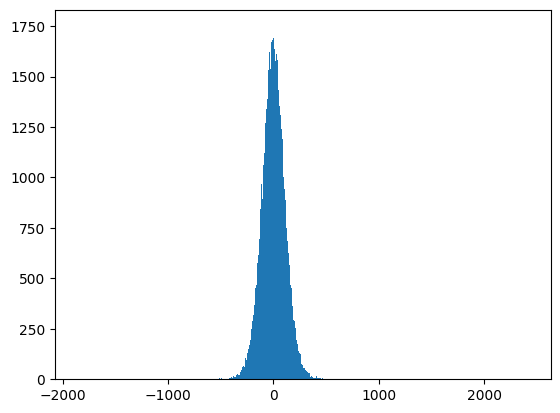

In [50]:
plt.hist(teff - allStars.teff, 1000);

[5.08045118816712e-07, 0.0022621809486320097]
[3.551701084643859e-05, 0.008726899516196925]


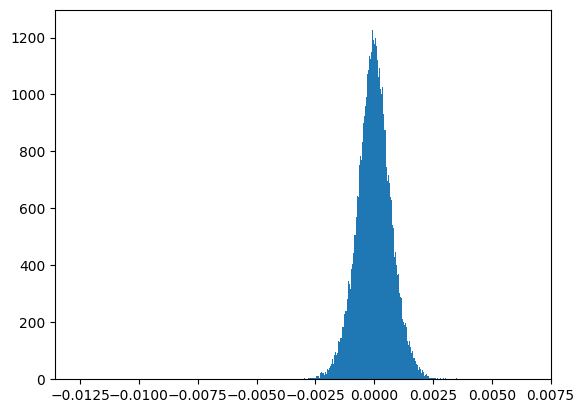

In [51]:
optHz = rm3D.getHzFlux(allStars.teff, hzType = "optimistic")
plt.hist(optHzHighmed - optHz[1,:], 1000);
print([np.median((optHzHighmed - optHz[1,:])/optHz[1,:]), np.std((optHzHighmed - optHz[1,:])/optHz[1,:])])
print([np.mean((optHzLowmed - optHz[0,:])/optHz[1,:]), np.std((optHzLowmed - optHz[0,:])/optHz[1,:])])

In [52]:
np.mean(optHz[1,:])

0.31559945843036813

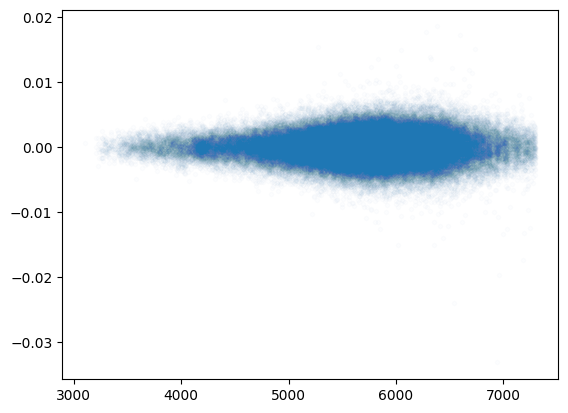

In [53]:
plt.plot(allStars.teff, (optHzHighmed - optHz[1,:])/optHz[1,:], '.', alpha=0.01)